<a href="https://colab.research.google.com/github/tanuuukk/Roadlanedetect/blob/main/Task_1_Road_Lane_Line_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os
import math
from moviepy.editor import VideoFileClip
from IPython.display import HTML
%matplotlib inline

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)


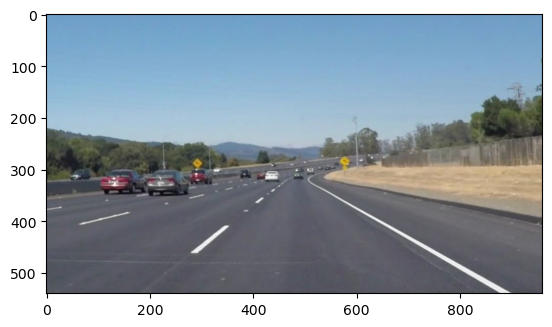

In [ ]:
img = mpimg.imread(r"C:\Users\Lenovo\Desktop\Road LAne detction\road.jpg")

print('This image is:', type(img), 'with dimesions:', img.shape)
plt.imshow(img)

In [ ]:
import math

def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def canny(img, low_threshold, high_threshold):
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    #defining a blank mask to start with
    mask = np.zeros_like(img)
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255

    #filling pixels inside the polygon defined by "vertices" with the fill color
    cv2.fillPoly(mask, vertices, ignore_mask_color)

    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=10):
    # In case of error, don't draw the line
    draw_right = True
    draw_left = True


    slope_threshold = 0.5
    slopes = []
    new_lines = []
    for line in lines:
        x1, y1, x2, y2 = line[0]


        if x2 - x1 == 0.:
            slope = 999.
        else:
            slope = (y2 - y1) / (x2 - x1)

        # Filter lines based on slope
        if abs(slope) > slope_threshold:
            slopes.append(slope)
            new_lines.append(line)

    lines = new_lines

    right_lines = []
    left_lines = []
    for i, line in enumerate(lines):
        x1, y1, x2, y2 = line[0]
        img_x_center = img.shape[1] / 2
        if slopes[i] > 0 and x1 > img_x_center and x2 > img_x_center:
            right_lines.append(line)
        elif slopes[i] < 0 and x1 < img_x_center and x2 < img_x_center:
            left_lines.append(line)


    right_lines_x = []
    right_lines_y = []

    for line in right_lines:
        x1, y1, x2, y2 = line[0]

        right_lines_x.append(x1)
        right_lines_x.append(x2)

        right_lines_y.append(y1)
        right_lines_y.append(y2)

    if len(right_lines_x) > 0:
        right_m, right_b = np.polyfit(right_lines_x, right_lines_y, 1)  # y = m*x + b
    else:
        right_m, right_b = 1, 1
        draw_right = False


    left_lines_x = []
    left_lines_y = []

    for line in left_lines:
        x1, y1, x2, y2 = line[0]

        left_lines_x.append(x1)
        left_lines_x.append(x2)

        left_lines_y.append(y1)
        left_lines_y.append(y2)

    if len(left_lines_x) > 0:
        left_m, left_b = np.polyfit(left_lines_x, left_lines_y, 1)  # y = m*x + b
    else:
        left_m, left_b = 1, 1
        draw_left = False


    y1 = img.shape[0]
    y2 = img.shape[0] * (1 - trap_height)

    right_x1 = (y1 - right_b) / right_m
    right_x2 = (y2 - right_b) / right_m

    left_x1 = (y1 - left_b) / left_m
    left_x2 = (y2 - left_b) / left_m

    # Convert calculated end points from float to int
    y1 = int(y1)
    y2 = int(y2)
    right_x1 = int(right_x1)
    right_x2 = int(right_x2)
    left_x1 = int(left_x1)
    left_x2 = int(left_x2)

    # Draw the right and left lines on image
    if draw_right:
        cv2.line(img, (right_x1, y1), (right_x2, y2), color, thickness)
    if draw_left:
        cv2.line(img, (left_x1, y1), (left_x2, y2), color, thickness)


def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):

    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)

    line_img = np.zeros((*img.shape, 3), dtype=np.uint8)
    draw_lines(line_img, lines)

    return line_img



def weightimg(img, initial_img, α=0.8, β=1., λ=0.):
    return cv2.addWeighted(initial_img, α, img, β, λ)


def filcolors(image):
    white_threshold = 200
    lower_white = np.array([white_threshold, white_threshold, white_threshold])
    upper_white = np.array([255, 255, 255])
    white_mask = cv2.inRange(image, lower_white, upper_white)
    white_image = cv2.bitwise_and(image, image, mask=white_mask)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_yellow = np.array([90,100,100])
    upper_yellow = np.array([110,255,255])
    yellow_mask = cv2.inRange(hsv, lower_yellow, upper_yellow)
    yellow_image = cv2.bitwise_and(image, image, mask=yellow_mask)
    image2 = cv2.addWeighted(white_image, 1., yellow_image, 1., 0.)

    return image2

In [ ]:
import os
os.listdir(r"C:\Users\Lenovo\Desktop\Road LAne detction")

['.ipynb_checkpoints',
 'laneline.mp4',
 'Road Lane Line Detection.ipynb',
 'road.jpg',
 'road.mp4']

In [ ]:
kernel_size = 3
low_threshold = 50
high_threshold = 150
trap_bottom_width = 0.85
trap_top_width = 0.07
trap_height = 0.4
rho = 2
theta = 1 * np.pi/180
threshold = 15
min_line_length = 10
max_line_gap = 20

In [ ]:
def annotate_image(image_in):
    """ Given an image Numpy array, return the annotated image as a Numpy array """
    # Only keep white and yellow pixels in the image, all other pixels become black
    image = filcolors(image_in)

    # Read in and grayscale the image
    #image = (image*255).astype('uint8')  # this step is unnecessary now
    gray = grayscale(image)

    # Apply Gaussian smoothing
    blur_gray = gaussian_blur(gray, kernel_size)

    # Apply Canny Edge Detector
    edges = canny(blur_gray, low_threshold, high_threshold)

    # Create masked edges using trapezoid-shaped region-of-interest
    imshape = image.shape
    vertices = np.array([[\
        ((imshape[1] * (1 - trap_bottom_width)) // 2, imshape[0]),\
        ((imshape[1] * (1 - trap_top_width)) // 2, imshape[0] - imshape[0] * trap_height),\
        (imshape[1] - (imshape[1] * (1 - trap_top_width)) // 2, imshape[0] - imshape[0] * trap_height),\
        (imshape[1] - (imshape[1] * (1 - trap_bottom_width)) // 2, imshape[0])]]\
        , dtype=np.int32)
    masked_edges = region_of_interest(edges, vertices)

    # Run Hough on edge detected image
    line_image = hough_lines(masked_edges, rho, theta, threshold, min_line_length, max_line_gap)

    # Draw lane lines on the original image
    initial_image = image_in.astype('uint8')
    annotated_image = weightimg(line_image, initial_image)

    return annotated_image

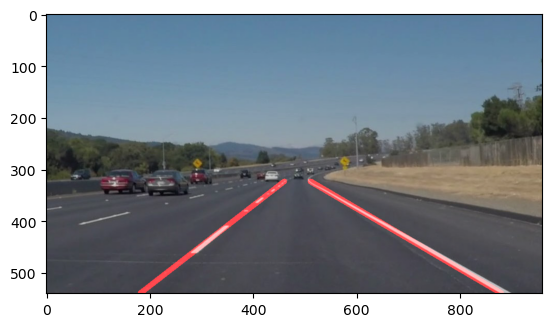

In [ ]:
# Display an  image
annotated_image = annotate_image(mpimg.imread('road.jpg'))
plt.imshow(annotated_image)

In [ ]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [ ]:
def process_image(image):
    result = annotate_image(image)
    return result

In [ ]:
white_output = 'laneline.mp4'
clip1 = VideoFileClip(r"C:\Users\Lenovo\Desktop\Road LAne detction\road.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

Moviepy - Building video laneline.mp4.
Moviepy - Writing video laneline.mp4



Moviepy - Done !
Moviepy - video ready laneline.mp4
CPU times: total: 22.3 s
Wall time: 13.1 s


In [ ]:
HTML("""
<video width="840" height="340" controls>
  <source src="{0}">
</video>
""".format(white_output))